First, Python packages need to be imported for this project.

In [1]:
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import dataframe_image as dfi

Next, within the dataset chronicling all medals from all Olympic Games, those pertaining to 1960 through 2022 need to be selected.



In [2]:
# Initial data dump
col_list = ['discipline_title', 'slug_game', 'event_title', 
            'medal_type', 'country_name', 'country_3_letter_code']
medal_table = pd.read_csv('archive/olympic_medals.csv', usecols = col_list)

# Extract columns for hosting city and year from "slug_game" column
medal_table['City'] = medal_table['slug_game'].str[:-4].str.replace('-', ' ').str.strip().str.title()
medal_table['Year'] = medal_table['slug_game'].str[-4:]

# Format event titles and medal types
medal_table['event_title'] = medal_table['event_title'].str.title()
medal_table['medal_type'] = medal_table['medal_type'].str.lower().str.title()

# Clean medal table with organized data
new_col_list = ['Year', 'City', 'discipline_title', 'event_title', 
                'medal_type', 'country_name', 'country_3_letter_code']
new_medal_table = medal_table[new_col_list]

# Rename cleaned medal columns
new_medal_table = new_medal_table.rename(columns = {
    'discipline_title': 'Sport',
    'event_title': 'Event',
    'medal_type': 'Medal',
    'country_name': 'Country Name',
    'country_3_letter_code': 'Country Code'
})

In [3]:
new_medal_table

,Year,City,Sport,Event,Medal,Country Name,Country Code
0,2022,Beijing,Curling,Mixed Doubles,Gold,Italy,ITA
1,2022,Beijing,Curling,Mixed Doubles,Gold,Italy,ITA
2,2022,Beijing,Curling,Mixed Doubles,Silver,Norway,NOR
3,2022,Beijing,Curling,Mixed Doubles,Silver,Norway,NOR
4,2022,Beijing,Curling,Mixed Doubles,Bronze,Sweden,SWE
...,...,...,...,...,...,...,...
21692,1896,Athens,Weightlifting,Heavyweight - One Hand Lift Men,Silver,Denmark,DEN
21693,1896,Athens,Weightlifting,Heavyweight - One Hand Lift Men,Bronze,Greece,GRE
21694,1896,Athens,Weightlifting,Heavyweight - Two Hand Lift Men,Gold,Denmark,DEN
21695,1896,Athens,Weightlifting,Heavyweight - Two Hand Lift Men,Silver,Great Britain,GBR


The table is now compact and readable, but now needs only the rows that pertain to the Winter Olympics games from 1960 to 2022.

1964 &emsp; Innsbruck, Austria

1968 &emsp; Grenoble, France

1972 &emsp; Sapporo, Japan

1976 &emsp; Innsbruck, Austria

1980 &emsp; Lake Placid, New York, USA

1984 &emsp; Sarajevo, Bosnia and Herzegovina (Yugoslavia)

1988 &emsp; Calgary, Alberta, Canada

1992 &emsp; Albertville, France

1994 &emsp; Lillehamer, Norway

1998 &emsp; Nagano, Japan

2002 &emsp;Salt Lake City, Utah, USA

2006 &emsp; Turin, Italy

2010 &emsp; Vancouver, British Columbia, Canada

2014 &emsp; Sochi, Russia

2018 &emsp; Pyeongchang, South Korea

2022 &emsp; Beijing, China

In [4]:
# List the years and cities for the Winter Olympic games of interest
winter_years = ['1964', '1968', '1972', '1976','1980', '1984', '1988', '1992', 
                '1994', '1998', '2002', '2006', '2010', '2014', '2018', '2022']
                
winter_cities = ['Innsbruck', 'Grenoble', 'Sapporo', 'Innsbruck', 'Lake Placid',  'Sarajevo', 
                 'Calgary', 'Albertille', 'Lillehamer', 'Nagano',  'Salt Lake City', 'Turin', 
                 'Vancouver', 'Sochi', 'Pyeongchang', 'Beijing']

# Select the rows based on the above set of games
winter_medal_table = new_medal_table.loc[new_medal_table['Year'].isin(winter_years)]
winter_medal_table = winter_medal_table.loc[winter_medal_table['City'].isin(winter_cities)]

In [5]:
winter_medal_table

,Year,City,Sport,Event,Medal,Country Name,Country Code
0,2022,Beijing,Curling,Mixed Doubles,Gold,Italy,ITA
1,2022,Beijing,Curling,Mixed Doubles,Gold,Italy,ITA
2,2022,Beijing,Curling,Mixed Doubles,Silver,Norway,NOR
3,2022,Beijing,Curling,Mixed Doubles,Silver,Norway,NOR
4,2022,Beijing,Curling,Mixed Doubles,Bronze,Sweden,SWE
...,...,...,...,...,...,...,...
16012,1964,Innsbruck,Bobsleigh,Two-Man Men,Bronze,Italy,ITA
16013,1964,Innsbruck,Bobsleigh,Two-Man Men,Bronze,Italy,ITA
16014,1964,Innsbruck,Bobsleigh,Four-Man Men,Gold,Canada,CAN
16015,1964,Innsbruck,Bobsleigh,Four-Man Men,Silver,Austria,AUT


Now with the medal count data aggregated, it shall be important to clean the list of countries below in order to simplify it, since it consists of countries no longer in existence (such as the Soviet Union or Yugoslavia) and those that have for not very long (such as Belarus and Ukraine).

In [6]:
winter_medal_table['Country Name'].value_counts()

Norway                                   274
United States of America                 266
Germany                                  242
Canada                                   200
Austria                                  184
Soviet Union                             180
Switzerland                              135
Netherlands                              134
Sweden                                   129
German Democratic Republic (Germany)     129
Russian Federation                       114
France                                   114
Finland                                  112
Italy                                    112
People's Republic of China                78
Republic of Korea                         69
Japan                                     63
Federal Republic of Germany               48
ROC                                       38
Czech Republic                            33
Great Britain                             23
Slovenia                                  21
Poland    

That is why the three-letter country code is critical for comparing data in the Winter Olympic medal count (1960 - 2022) versus those which are currently evaluated by the World Bank for historic GDP.

In [7]:
# Initial data dump (note: data only extends to 2020 and will have to be extrapolated)
WB_country_list = ['Country Name', 'Country Code']
WB_year_list = ['1964', '1968', '1972', '1976','1980', '1984', '1988', '1992', 
                '1994', '1998', '2002', '2006', '2010', '2014', '2018', '2020']
WB_GDP = pd.read_csv(
    'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3930485/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3930485.csv', 
    skiprows = 4,
    usecols = (WB_country_list + WB_year_list))

However, first the countries that are listed in the medal table need to have their codes verified in order to ensure that they are properly listed in the World Bank's economic data table.

In [8]:
# Create a list of the countries in the medal table to compare against the World Bank table
countries = winter_medal_table['Country Name'].value_counts().index[::].tolist()
codes = winter_medal_table['Country Code'].value_counts().index[::].tolist()
wrong = []

# Check which codes do not match
for index, code in enumerate(codes, 0):
    if WB_GDP['Country Code'].str.contains(code).any():
        pass
    else:
        wrong.append([countries[index], codes[index]])

In [9]:
wrong

[['Germany', 'GER'],
 ['Soviet Union', 'URS'],
 ['Switzerland', 'SUI'],
 ['Netherlands', 'NED'],
 ['German Democratic Republic (Germany)', 'GDR'],
 ['Federal Republic of Germany', 'FRG'],
 ['ROC', 'ROC'],
 ['Slovenia', 'SLO'],
 ['Czechoslovakia', 'TCH'],
 ['Olympic Athletes from Russia', 'OAR'],
 ['Latvia', 'LAT'],
 ['Croatia', 'CRO'],
 ['Bulgaria', 'BUL'],
 ['Yugoslavia', 'YUG'],
 ['Denmark', 'DEN']]

This issue needs to be nipped in the bud. Therefore, the countries listed above need their codes changed in order to have their GNI per capita data pulled. It is easier to apply these changes to the World Bank table, since each country has its own row.

Also, due to doping scandals among Russian athletes, the Russian Federation (RUS) has been banned from having an official delegation and hence had to compete as "Olympic Athletes from Russia" (OAR) in Pyeongchang 2018 and the "Russian Olympic Committee" in Beijing 2022. Despite this, it is just easier to merge these delegations into that of the Russian Federation.

In [10]:
# Change the country codes in the World Bank table to match that of the Winter Olympic table
for country in wrong:
    WB_GDP.loc[
        WB_GDP['Country Name'] == country[0], 'Country Code'] = country[1]

# Consolidate the entries in the Winter Olympic medal table for the Russian Federation
winter_medal_table['Country Name'].replace({'ROC': 'Russian Federation',
                                        'Olympic Athletes from Russia': 'Russian Federation'},
                                          inplace = True)
winter_medal_table['Country Code'].replace({'ROC': 'RUS', 'OAR': 'RUS'}, inplace = True)

# Change Liechtenstein to Austria to make things simpler
winter_medal_table['Country Name'].replace({'Liechtenstein': 'Austria'}, inplace = True)
winter_medal_table['Country Code'].replace({'LIE': 'AUT'}, inplace = True)

In [11]:
# Limit list only to countries that have scored medals in the Winter Olympics
WB_GDP = WB_GDP.loc[WB_GDP['Country Code'] \
                                          .isin(winter_medal_table['Country Code'])] \
                                          .sort_values(by='Country Code', ascending=True)

In [12]:
WB_GDP

,Country Name,Country Code,1964,1968,1972,1976,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014,2018,2020
13,Australia,AUS,2.380110e+10,3.271699e+10,5.205140e+10,1.051015e+11,1.500323e+11,1.935936e+11,2.360659e+11,3.254803e+11,3.228073e+11,3.994045e+11,3.953427e+11,7.475562e+11,1.147589e+12,1.467505e+12,1.428530e+12,1.327836e+12
14,Austria,AUT,9.169984e+09,1.244063e+10,2.205961e+10,4.295998e+10,8.205891e+10,6.798534e+10,1.333394e+11,1.950781e+11,2.035352e+11,2.182599e+11,2.133778e+11,3.359986e+11,3.918927e+11,4.419961e+11,4.549459e+11,4.332585e+11
17,Belgium,BEL,1.596011e+10,2.137635e+10,3.720942e+10,7.111388e+10,1.268293e+11,8.334953e+10,1.622991e+11,2.347817e+11,2.448841e+11,2.585283e+11,2.571578e+11,4.079181e+11,4.809516e+11,5.346781e+11,5.430085e+11,5.218613e+11
25,Belarus,BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.779300e+10,1.526437e+10,1.459425e+10,3.695431e+10,5.722249e+10,7.881384e+10,6.003126e+10,6.025824e+10
21,Bulgaria,BUL,NaN,NaN,NaN,NaN,1.983923e+10,1.759494e+10,2.255594e+10,1.035052e+10,9.697417e+09,1.503070e+10,1.640285e+10,3.437981e+10,5.068206e+10,5.708201e+10,6.636342e+10,6.988935e+10
35,Canada,CAN,4.937752e+10,7.182981e+10,1.130828e+11,2.065756e+11,2.738538e+11,3.553726e+11,5.073544e+11,5.923877e+11,5.781393e+11,6.340000e+11,7.606493e+11,1.319265e+12,1.617343e+12,1.805750e+12,1.725329e+12,1.645423e+12
40,China,CHN,5.970834e+10,7.084654e+10,1.136876e+11,1.539405e+11,1.911492e+11,2.599465e+11,3.123536e+11,4.269157e+11,5.643247e+11,1.029043e+12,1.470550e+12,2.752132e+12,6.087164e+12,1.047568e+13,1.389482e+13,1.472273e+13
99,Croatia,CRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579288e+10,2.707455e+10,5.086079e+10,6.042602e+10,5.833029e+10,6.224787e+10,5.720378e+10
54,Czech Republic,CZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.480501e+10,4.785020e+10,6.680743e+10,8.219600e+10,1.562641e+11,2.090699e+11,2.093588e+11,2.489501e+11,2.453393e+11
58,Denmark,DEN,NaN,1.350557e+10,2.323238e+10,4.457589e+10,7.112753e+10,5.910524e+10,1.155528e+11,1.529157e+11,1.561624e+11,1.769919e+11,1.786352e+11,2.828849e+11,3.219953e+11,3.529936e+11,3.568412e+11,3.560849e+11


Obviously, due to the birth of new nations as well as the emergence of formerly communist ones (such as Poland and Romania) in the world scene result in a lack of GDP data for up until the early 1990s. Even data for Winter Olympic powerhouses such as Slovenia is missing up until the late 1900s, as well as some countries have missing data altogether (such North Korea and Liechtenstein at the present).

In order to conduct a more focused analysis of more recent Winter Olympic trends, it would be far simpler and more accurate to set the beginning of the study to 1998 in order to accommodate Slovenia as well as eliminate Liechtenstein (which is culturally similar to Austria and Switzerland) and North Korea (which is just a poor version of South Korea) entirely. Also, 1998 was the first year snowboarding was introduced into the Winter Olympics as an official sport with medals awarded.

In [13]:
# Trimmed down year list
year_list = ['1998', '2002', '2006', '2010', '2014', '2018', '2020']

# Limit list only to countries with reliable data as explained above
GDP = WB_GDP[WB_country_list + year_list].loc[
    (WB_GDP['Country Code'] != 'LIE') &
    (WB_GDP['Country Code'] != 'PRK')]

In [14]:
GDP

,Country Name,Country Code,1998,2002,2006,2010,2014,2018,2020
13,Australia,AUS,3.994045e+11,3.953427e+11,7.475562e+11,1.147589e+12,1.467505e+12,1.428530e+12,1.327836e+12
14,Austria,AUT,2.182599e+11,2.133778e+11,3.359986e+11,3.918927e+11,4.419961e+11,4.549459e+11,4.332585e+11
17,Belgium,BEL,2.585283e+11,2.571578e+11,4.079181e+11,4.809516e+11,5.346781e+11,5.430085e+11,5.218613e+11
25,Belarus,BLR,1.526437e+10,1.459425e+10,3.695431e+10,5.722249e+10,7.881384e+10,6.003126e+10,6.025824e+10
21,Bulgaria,BUL,1.503070e+10,1.640285e+10,3.437981e+10,5.068206e+10,5.708201e+10,6.636342e+10,6.988935e+10
35,Canada,CAN,6.340000e+11,7.606493e+11,1.319265e+12,1.617343e+12,1.805750e+12,1.725329e+12,1.645423e+12
40,China,CHN,1.029043e+12,1.470550e+12,2.752132e+12,6.087164e+12,1.047568e+13,1.389482e+13,1.472273e+13
99,Croatia,CRO,2.579288e+10,2.707455e+10,5.086079e+10,6.042602e+10,5.833029e+10,6.224787e+10,5.720378e+10
54,Czech Republic,CZE,6.680743e+10,8.219600e+10,1.562641e+11,2.090699e+11,2.093588e+11,2.489501e+11,2.453393e+11
58,Denmark,DEN,1.769919e+11,1.786352e+11,2.828849e+11,3.219953e+11,3.529936e+11,3.568412e+11,3.560849e+11


Now given this streamlined table, the final step shall be to extrapolate the GDP of the respective countries from 1998 to 2022 using the InterpolatedUnivariateSpline feature of the SciPy package. Use a linear curve to account for the fact that these mostly developed countries have a slower economic growth rate compared to that of developing countries.

In [15]:
# Initialize a new column as a list
new_col = []

# Loop through each country to extrapolate to the year 2022
for index, country in enumerate(GDP['Country Code'], 0):
    # Given values
    xi = np.array([int(x) for x in year_list])
    yi = np.array(GDP.loc[GDP['Country Code'] == country][year_list])
    # Positions to inter/extrapolate
    x = np.linspace(1998, 2022)
    # spline order: 1 linear, 2 quadratic, 3 cubic ... 
    order = 1
    # do inter/extrapolation
    s = InterpolatedUnivariateSpline(xi, yi, k = order)
    y = s(x)
    new_col.append(y[(len(y)) - 1])

# Extract columns for hosting city and year from "slug_game" column
GDP['2022'] = new_col

# Finally, drop the column for the year 2020
GDP = GDP.drop(columns = '2020', axis = 1)

In [16]:
GDP

,Country Name,Country Code,1998,2002,2006,2010,2014,2018,2022
13,Australia,AUS,3.994045e+11,3.953427e+11,7.475562e+11,1.147589e+12,1.467505e+12,1.428530e+12,1.227143e+12
14,Austria,AUT,2.182599e+11,2.133778e+11,3.359986e+11,3.918927e+11,4.419961e+11,4.549459e+11,4.115711e+11
17,Belgium,BEL,2.585283e+11,2.571578e+11,4.079181e+11,4.809516e+11,5.346781e+11,5.430085e+11,5.007141e+11
25,Belarus,BLR,1.526437e+10,1.459425e+10,3.695431e+10,5.722249e+10,7.881384e+10,6.003126e+10,6.048522e+10
21,Bulgaria,BUL,1.503070e+10,1.640285e+10,3.437981e+10,5.068206e+10,5.708201e+10,6.636342e+10,7.341527e+10
35,Canada,CAN,6.340000e+11,7.606493e+11,1.319265e+12,1.617343e+12,1.805750e+12,1.725329e+12,1.565518e+12
40,China,CHN,1.029043e+12,1.470550e+12,2.752132e+12,6.087164e+12,1.047568e+13,1.389482e+13,1.555064e+13
99,Croatia,CRO,2.579288e+10,2.707455e+10,5.086079e+10,6.042602e+10,5.833029e+10,6.224787e+10,5.215969e+10
54,Czech Republic,CZE,6.680743e+10,8.219600e+10,1.562641e+11,2.090699e+11,2.093588e+11,2.489501e+11,2.417285e+11
58,Denmark,DEN,1.769919e+11,1.786352e+11,2.828849e+11,3.219953e+11,3.529936e+11,3.568412e+11,3.553285e+11


Correspondingly, trim down the table of Winter Olympic Medals to that of the smaller range of years being studied (basically, the 21st century).

In [17]:
# Trimmed down year list now with 2022 properly at the end
new_year_list = ['1998', '2002', '2006', '2010', '2014', '2018', '2022']

# Select the rows based on the above set of games
winter_medal_table = winter_medal_table.loc[winter_medal_table['Year'].isin(new_year_list)]

In [18]:
winter_medal_table

,Year,City,Sport,Event,Medal,Country Name,Country Code
0,2022,Beijing,Curling,Mixed Doubles,Gold,Italy,ITA
1,2022,Beijing,Curling,Mixed Doubles,Gold,Italy,ITA
2,2022,Beijing,Curling,Mixed Doubles,Silver,Norway,NOR
3,2022,Beijing,Curling,Mixed Doubles,Silver,Norway,NOR
4,2022,Beijing,Curling,Mixed Doubles,Bronze,Sweden,SWE
...,...,...,...,...,...,...,...
8400,1998,Nagano,Short Track Speed Skating,500M Women,Silver,People's Republic of China,CHN
8401,1998,Nagano,Short Track Speed Skating,500M Women,Bronze,Republic of Korea,KOR
8402,1998,Nagano,Short Track Speed Skating,1000M Women,Gold,Republic of Korea,KOR
8403,1998,Nagano,Short Track Speed Skating,1000M Women,Silver,People's Republic of China,CHN


As a result, the medal count for each country has been greatly trimmed down to eliminate defunct and redundant countries.

In [19]:
winter_medal_table['Country Name'].value_counts()

Germany                       232
United States of America      204
Norway                        202
Canada                        177
Russian Federation            170
Austria                       128
Netherlands                    97
Sweden                         90
France                         88
Switzerland                    86
Italy                          80
People's Republic of China     78
Republic of Korea              69
Japan                          57
Finland                        56
Czech Republic                 33
Slovenia                       21
Poland                         19
Belarus                        18
Australia                      18
Great Britain                  17
Latvia                         14
Croatia                        11
Slovakia                       10
Estonia                         8
Ukraine                         8
Kazakhstan                      5
New Zealand                     5
Bulgaria                        5
Belgium       

The final level of cleaning needs to be performed in order to pick which names are simpler to present between the two tables

In [20]:
# Recreating the list of the countries from the trimmed Winter Olympics medal table
countries = winter_medal_table['Country Name'].value_counts().index[::].tolist()
codes = winter_medal_table['Country Code'].value_counts().index[::].tolist()
mismatch = []

# Check which codes do not match
for index, code in enumerate(codes, 0):
    if (GDP.loc[GDP['Country Code'] == code, 'Country Name']
        == countries[index]).any():
        pass
    else:
        mismatch.append([countries[index], 
                         GDP.loc[GDP['Country Code'] == code]
                                                ['Country Name']])

In [21]:
mismatch

[['United States of America',
  251    United States
  Name: Country Name, dtype: object],
 ["People's Republic of China",
  40    China
  Name: Country Name, dtype: object],
 ['Republic of Korea',
  126    Korea, Rep.
  Name: Country Name, dtype: object],
 ['Great Britain',
  81    United Kingdom
  Name: Country Name, dtype: object],
 ['Slovakia',
  221    Slovak Republic
  Name: Country Name, dtype: object]]

The simplest name is the best. Therefore, the following shall be implemented on both tables.

In [22]:
# Change country names in the Winter Olympic medal table
winter_medal_table['Country Name'].replace({'United States of America': 'United States'},
                                          inplace = True)
winter_medal_table['Country Name'].replace({"People's Republic of China": 'China'},
                                          inplace = True)
winter_medal_table['Country Name'].replace({'Republic of Korea': 'South Korea'},
                                          inplace = True)
winter_medal_table['Country Name'].replace({'Great Britain': 'United Kingdom'},
                                          inplace = True)


# Change country names in the World Bank table
GDP.loc[
    GDP['Country Name'] == 'Korea, Rep.', 'Country Name'] = 'South Korea'
GDP.loc[
    GDP['Country Name'] == 'Slovak Republic', 'Country Name'] = 'Slovakia'

/Users/jchatterjee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
winter_medal_table['Country Name'].value_counts()

Germany               232
United States         204
Norway                202
Canada                177
Russian Federation    170
Austria               128
Netherlands            97
Sweden                 90
France                 88
Switzerland            86
Italy                  80
China                  78
South Korea            69
Japan                  57
Finland                56
Czech Republic         33
Slovenia               21
Poland                 19
Belarus                18
Australia              18
United Kingdom         17
Latvia                 14
Croatia                11
Slovakia               10
Estonia                 8
Ukraine                 8
Kazakhstan              5
New Zealand             5
Bulgaria                5
Belgium                 4
Hungary                 4
Spain                   3
Denmark                 1
Name: Country Name, dtype: int64

Finally, trim down the list of countries that have won medals during the years 2002 to 2022.

In [24]:
# Limit list only to countries that have scored medals in the Winter Olympics
GDP = GDP.loc[GDP['Country Code'] \
              .isin(winter_medal_table['Country Code'])] \
              .sort_values(by='Country Code', ascending = True)

# Set index to country name
GDP.index = GDP['Country Name']
GDP = GDP.drop(columns = ['Country Name', 'Country Code'])

In [25]:
GDP

,1998,2002,2006,2010,2014,2018,2022
Country Name,,,,,,,
Australia,3.994045e+11,3.953427e+11,7.475562e+11,1.147589e+12,1.467505e+12,1.428530e+12,1.227143e+12
Austria,2.182599e+11,2.133778e+11,3.359986e+11,3.918927e+11,4.419961e+11,4.549459e+11,4.115711e+11
Belgium,2.585283e+11,2.571578e+11,4.079181e+11,4.809516e+11,5.346781e+11,5.430085e+11,5.007141e+11
Belarus,1.526437e+10,1.459425e+10,3.695431e+10,5.722249e+10,7.881384e+10,6.003126e+10,6.048522e+10
Bulgaria,1.503070e+10,1.640285e+10,3.437981e+10,5.068206e+10,5.708201e+10,6.636342e+10,7.341527e+10
Canada,6.340000e+11,7.606493e+11,1.319265e+12,1.617343e+12,1.805750e+12,1.725329e+12,1.565518e+12
China,1.029043e+12,1.470550e+12,2.752132e+12,6.087164e+12,1.047568e+13,1.389482e+13,1.555064e+13
Croatia,2.579288e+10,2.707455e+10,5.086079e+10,6.042602e+10,5.833029e+10,6.224787e+10,5.215969e+10
Czech Republic,6.680743e+10,8.219600e+10,1.562641e+11,2.090699e+11,2.093588e+11,2.489501e+11,2.417285e+11


Since the time frame is rather short and the countries listed are relatively political stable (ignoring the present situation in Eastern Europe), there is no need to factor in inflation for the GDP figures.

In [26]:
# Initial data dump (note: data only extends to 2020 and will have to be extrapolated)
pop_country_list = ['Country Name', 'Country Code']
pop_year_list = ['1998', '2002', '2006', '2010', '2014', '2018', '2020']
population = pd.read_csv(
    'API_SP.POP.TOTL_DS2_en_csv_v2_3918567/API_SP.POP.TOTL_DS2_en_csv_v2_3918567.csv', 
    skiprows = 4,
    usecols = (pop_country_list + pop_year_list))

# Change country names in the World Bank table
population.loc[
    population['Country Name'] == 'Korea, Rep.', 'Country Name'] = 'South Korea'
population.loc[
    population['Country Name'] == 'Slovak Republic', 'Country Name'] = 'Slovakia'

# Change the country codes in the World Bank table to match that of the Winter Olympic table
for country in wrong:
    population.loc[
        population['Country Name'] == country[0], 'Country Code'] = country[1]

# Limit list only to countries that have scored medals in the Winter Olympics
population = population.loc[population['Country Code'] \
                                          .isin(winter_medal_table['Country Code'])] \
                                          .sort_values(by='Country Code', ascending = True)

# Initialize a new column as a list
new_col = []

# Loop through each country to extrapolate to the year 2022
for index, country in enumerate(population['Country Code'], 0):
    # Given values
    xi = np.array([int(x) for x in year_list])
    yi = np.array(population.loc[population['Country Code'] == country][year_list])
    # Positions to inter/extrapolate
    x = np.linspace(1998, 2022)
    # spline order: 1 linear, 2 quadratic, 3 cubic ... 
    order = 1
    # do inter/extrapolation
    s = InterpolatedUnivariateSpline(xi, yi, k = order)
    y = s(x)
    new_col.append(y[(len(y)) - 1])

# Extract columns for hosting city and year from "slug_game" column
population['2022'] = new_col

# Finally, drop the column for the year 2020
population = population.drop(columns = '2020', axis = 1)

# Set index to country name
population.index = population['Country Name']
population = population.drop(columns = ['Country Name', 'Country Code'])

In [27]:
population

,1998,2002,2006,2010,2014,2018,2022
Country Name,,,,,,,
Australia,1.871100e+07,1.965140e+07,2.069790e+07,2.203175e+07,2.347569e+07,2.498269e+07,2.639139e+07
Austria,7.976789e+06,8.081957e+06,8.268641e+06,8.363404e+06,8.546356e+06,8.840521e+06,8.993889e+06
Belgium,1.020301e+07,1.033278e+07,1.054796e+07,1.089559e+07,1.120906e+07,1.142705e+07,1.168494e+07
Belarus,1.007196e+07,9.865548e+06,9.604924e+06,9.483836e+06,9.448515e+06,9.438785e+06,9.321119e+06
Bulgaria,8.256786e+06,7.837161e+06,7.601022e+06,7.395599e+06,7.223938e+06,7.025037e+06,6.842993e+06
Canada,3.015517e+07,3.136008e+07,3.257117e+07,3.400489e+07,3.543744e+07,3.706518e+07,3.894530e+07
China,1.241935e+09,1.280400e+09,1.311020e+09,1.337705e+09,1.371860e+09,1.402760e+09,1.419099e+09
Croatia,4.532135e+06,4.302174e+06,4.311159e+06,4.295427e+06,4.238389e+06,4.087843e+06,4.006557e+06
Czech Republic,1.029437e+07,1.019692e+07,1.023890e+07,1.047441e+07,1.052535e+07,1.062993e+07,1.076786e+07


After the GDP and population have been tabulated, the next step is to calculate the GDP per capita.

In [28]:
GDP_per_capita = (GDP / population)

In [29]:
GDP_per_capita.style.format('{:,.0f}')

,1998,2002,2006,2010,2014,2018,2022
Country Name,,,,,,,
Australia,"21,346","20,118","36,117","52,088","62,512","57,181","46,498"
Austria,"27,362","26,402","40,635","46,858","51,717","51,461","45,761"
Belgium,"25,338","24,888","38,673","44,142","47,701","47,520","42,851"
Belarus,"1,516","1,479","3,847","6,034","8,341","6,360","6,489"
Bulgaria,"1,820","2,093","4,523","6,853","7,902","9,447","10,729"
Canada,"21,025","24,255","40,504","47,562","50,956","46,549","40,198"
China,829,"1,149","2,099","4,550","7,636","9,905","10,958"
Croatia,"5,691","6,293","11,797","14,068","13,762","15,228","13,019"
Czech Republic,"6,490","8,061","15,262","19,960","19,891","23,420","22,449"


First, general medal count data shall be tallied. The actual weighting of the medal does not matter, but only the overall quantity of them regardless of whether they were gold, silver, or bronze.

In [30]:
# Copy a table that have country names
medal_count = population.copy()

# Clean the table
for col in medal_count.columns:
    medal_count[col].values[:] = 0

olympiads = new_year_list

# Populate the table with the number of medals per country per olympiad
for index, year in enumerate(olympiads, 0):
    # Find medals in each year
    medals = winter_medal_table[winter_medal_table['Year'].isin([year])]
    # Count values
    medals = medals['Country Name'].value_counts()
    # Create dataframe
    medals = medals.to_frame()
    # Extract values and index
    medals_values = medals['Country Name']
    medals_index = medals.index
    # Dump values into the table
    medal_count.loc[medals_index, year] = medals_values
    # Convert to int
    medal_count[year] = medal_count[year].astype('int')

# Sum all olympiads, since no progressive pattern can be identified
medal_count['Total'] = medal_count[olympiads].sum(axis = 1)

In [31]:
medal_count

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Australia,1,2,2,3,3,3,4,18
Austria,17,17,24,17,18,16,19,128
Belgium,1,0,0,0,0,1,2,4
Belarus,2,1,1,3,6,3,2,18
Bulgaria,1,3,1,0,0,0,0,5
Canada,16,18,26,29,27,34,27,177
China,8,9,13,13,9,10,16,78
Croatia,0,4,3,3,1,0,0,11
Czech Republic,3,3,4,6,8,7,2,33


Next, the medals shall be differentiated by event.

In [32]:
winter_medal_table['Sport'].value_counts()

Cross Country Skiing         277
Speed skating                252
Alpine Skiing                217
Biathlon                     199
Snowboard                    156
Freestyle Skiing             153
Short Track Speed Skating    141
Figure skating               136
Bobsleigh                    103
Luge                          93
Ski Jumping                   75
Nordic Combined               60
Curling                       54
Ice Hockey                    42
Skeleton                      36
Short Track                   24
Name: Sport, dtype: int64

Clean the data to merge "Short Track" with "Short Track Speed Skating".

In [33]:
# Change sport names in the Winter Olympic medal table
winter_medal_table['Sport'].replace({'Short Track': 'Short Track Speed Skating'},
                                          inplace = True)
winter_medal_table['Sport'].replace({'Speed skating': 'Long Track Speed Skating'},
                                          inplace = True)

/Users/jchatterjee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
winter_medal_table['Sport'].value_counts()

Cross Country Skiing         277
Long Track Speed Skating     252
Alpine Skiing                217
Biathlon                     199
Short Track Speed Skating    165
Snowboard                    156
Freestyle Skiing             153
Figure skating               136
Bobsleigh                    103
Luge                          93
Ski Jumping                   75
Nordic Combined               60
Curling                       54
Ice Hockey                    42
Skeleton                      36
Name: Sport, dtype: int64

Now excluding freestyle skiing and  figure skating, which are subjecting in their scoring; and curling and ice hockey, which are limited in their number of participating countries; the following sports shall be grouped together as follows:

Sledding:
* Bobsleigh
* Luge
* Skeleton

Skating:
* Long Track Speed Skating
* Short Track Speed Skating

Skiing:
* Alpine Skiing
* Biathlon
* Cross Country Skiing
* Nordic Combined
* Ski Jumping

Snowboarding:
* Snowboard

In [35]:
# Define the categories of sports as aggregated above
sledding = ['Bobsleigh', 'Luge', 'Skeleton']
skating = ['Long Track Speed Skating', 'Short Track Speed Skating']
skiing = ['Alpine Skiing', 'Biathlon', 'Cross Country Skiing', 'Nordic Combined', 'Ski Jumping']
snowboarding = ['Snowboard']

# Copy a table that have country names
medal_count_sledding = population.copy()
medal_count_skating = population.copy()
medal_count_skiing = population.copy()
medal_count_snowboarding = population.copy()

# Clean the table
for col in population.columns:
    medal_count_sledding[col].values[:] = 0
    medal_count_skating[col].values[:] = 0
    medal_count_skiing[col].values[:] = 0
    medal_count_snowboarding[col].values[:] = 0

olympiads = new_year_list

# Populate the table with the number of medals per country per olympiad
for index, year in enumerate(olympiads, 0):
    # Find medals in each year
    medals_sledding = winter_medal_table.loc[winter_medal_table['Sport'].isin(sledding)
                      & winter_medal_table['Year'].isin([year])]
    medals_skating = winter_medal_table.loc[winter_medal_table['Sport'].isin(skating)
                      & winter_medal_table['Year'].isin([year])]
    medals_skiing = winter_medal_table.loc[winter_medal_table['Sport'].isin(skiing)
                      & winter_medal_table['Year'].isin([year])]
    medals_snowboarding = winter_medal_table.loc[winter_medal_table['Sport'].isin(snowboarding)
                      & winter_medal_table['Year'].isin([year])]
    # Count values
    medals_sledding = medals_sledding['Country Name'].value_counts()
    medals_skating = medals_skating['Country Name'].value_counts()
    medals_skiing = medals_skiing['Country Name'].value_counts()
    medals_snowboarding = medals_snowboarding['Country Name'].value_counts()
    # Create dataframe
    medals_sledding = medals_sledding.to_frame()
    medals_skating = medals_skating.to_frame()
    medals_skiing = medals_skiing.to_frame()
    medals_snowboarding = medals_snowboarding.to_frame()
    # Extract values and index
    medals_values_sledding = medals_sledding['Country Name']
    medals_index_sledding = medals_sledding.index
    medals_values_skating = medals_skating['Country Name']
    medals_index_skating = medals_skating.index
    medals_values_skiing = medals_skiing['Country Name']
    medals_index_skiing = medals_skiing.index
    medals_values_snowboarding = medals_snowboarding['Country Name']
    medals_index_snowboarding = medals_snowboarding.index
    # Dump values into the table
    medal_count_sledding.loc[medals_index_sledding, year] = medals_values_sledding
    medal_count_skating.loc[medals_index_skating, year] = medals_values_skating
    medal_count_skiing.loc[medals_index_skiing, year] = medals_values_skiing
    medal_count_snowboarding.loc[medals_index_snowboarding, year] = medals_values_snowboarding
    # Convert to int
    medal_count_sledding[year] = medal_count_sledding[year].astype('int')
    medal_count_skating[year] = medal_count_skating[year].astype('int')
    medal_count_skiing[year] = medal_count_skiing[year].astype('int')
    medal_count_snowboarding[year] = medal_count_snowboarding[year].astype('int')

# Sum all olympiads, since no progressive pattern can be identified
medal_count_sledding['Total'] = medal_count_sledding[olympiads].sum(axis = 1)
medal_count_skating['Total'] = medal_count_skating[olympiads].sum(axis = 1)
medal_count_skiing['Total'] = medal_count_skiing[olympiads].sum(axis = 1)
medal_count_snowboarding['Total'] = medal_count_snowboarding[olympiads].sum(axis = 1)

In [36]:
medal_count_sledding

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Australia,0,0,0,0,0,0,1,1
Austria,1,2,2,3,2,4,4,18
Belgium,0,0,0,0,0,0,0,0
Belarus,0,0,0,0,0,0,0,0
Bulgaria,0,0,0,0,0,0,0,0
Canada,2,0,5,6,2,6,2,23
China,0,0,0,0,0,0,1,1
Croatia,0,0,0,0,0,0,0,0
Czech Republic,0,0,0,0,0,0,0,0


In [37]:
medal_count_skating

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Australia,0,1,0,0,0,0,0,1
Austria,0,0,0,0,0,0,0,0
Belgium,1,0,0,0,0,1,2,4
Belarus,0,0,0,0,0,0,0,0
Bulgaria,0,2,1,0,0,0,0,3
Canada,9,9,12,10,5,7,9,61
China,6,7,7,5,7,4,5,41
Croatia,0,0,0,0,0,0,0,0
Czech Republic,0,0,0,3,2,2,1,8


In [38]:
medal_count_skiing

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Australia,1,0,0,0,0,0,0,1
Austria,15,15,21,11,14,11,11,98
Belgium,0,0,0,0,0,0,0,0
Belarus,1,0,0,2,4,2,1,10
Bulgaria,1,1,0,0,0,0,0,2
Canada,0,1,3,0,1,0,2,7
China,0,0,0,0,0,0,0,0
Croatia,0,4,3,3,1,0,0,11
Czech Republic,2,2,3,3,5,3,0,18


In [39]:
medal_count_snowboarding

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Australia,0,0,0,1,1,2,2,6
Austria,1,0,1,2,2,1,4,11
Belgium,0,0,0,0,0,0,0,0
Belarus,0,0,0,0,0,0,0,0
Bulgaria,0,0,0,0,0,0,0,0
Canada,1,0,1,3,2,4,7,18
China,0,0,0,0,0,1,2,3
Croatia,0,0,0,0,0,0,0,0
Czech Republic,0,0,0,0,1,2,1,4


Now that the basic data has been compiled, the narrative can begin.

In [40]:
# Compile table
pop_vs_gdp_per_capita = population.merge(GDP_per_capita[['2022']], on = 'Country Name', 
                                  suffixes = ('',' GDP per Capita'))

# Clean table with organized data
new_col_list_pop_gdp_per_capita = ['2022', '2022 GDP per Capita']
pop_vs_gdp_per_capita = pop_vs_gdp_per_capita[new_col_list_pop_gdp_per_capita]

# Rename cleaned medal columns
pop_vs_gdp_per_capita = pop_vs_gdp_per_capita.rename(columns = {
    '2022': '2022 Population',
})

In [41]:
# Now create a unified table
unified = medal_count.merge(pop_vs_gdp_per_capita, on = 'Country Name')

# Clean table
unified_col_list = ['Total', '2022 Population', '2022 GDP per Capita']
unified = unified[unified_col_list]

# Rename cleaned medal columns
unified = unified.rename(columns = {
    'Total': 'Total Medals',
    '2022 Population': 'Population',
    '2022 GDP per Capita': 'GDP per Capita'
})

Classify the various countries in the respective continents to facilitate visualizing.

In [42]:
americas = ['Canada', 'United States']
europe = ['Austria', 'Belgium', 'Belarus', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark',
         'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Germany', 'Hungary',
         'Italy', 'Latvia', 'Netherlands', 'Norway', 'Poland', 'Russian Federation',
         'Slovenia', 'Switzerland', 'Slovakia', 'Sweden', 'Ukraine']
asia = ['China', 'Japan', 'Kazakhstan', 'South Korea']
oceania = ['Australia', 'New Zealand']

# This function will automatically assign region names
def which_region(country_name):
    if country_name in americas :
        return 'North America'
    elif country_name in europe:
        return 'Europe'
    elif country_name in asia :
        return 'Asia'
    else:
        return 'Oceania'

In [43]:
regions = []

for c in range(len(unified)):
    regions.append(which_region(unified.iloc[c].name))
    
df_reg = pd.DataFrame(regions)
df_reg['Region'] = regions
c2r = pd.merge(unified, df_reg, how = 'outer', on = unified.index)
c2r = c2r.set_index('key_0')
c2r.index.rename('Country Name', inplace = True)

# Clean table with organized data
c2r_col_list = ['Region']
c2r = c2r[c2r_col_list]

In [44]:
c2r

,Region
Country Name,
Australia,Oceania
Austria,Europe
Belgium,Europe
Belarus,Europe
Bulgaria,Europe
Canada,North America
China,Asia
Croatia,Europe
Czech Republic,Europe


In [45]:
unified.style.format('{:,.0f}')

,Total Medals,Population,GDP per Capita
Country Name,,,
Australia,18,"26,391,394","46,498"
Austria,128,"8,993,889","45,761"
Belgium,4,"11,684,940","42,851"
Belarus,18,"9,321,119","6,489"
Bulgaria,5,"6,842,993","10,729"
Canada,177,"38,945,298","40,198"
China,78,"1,419,098,724","10,958"
Croatia,11,"4,006,557","13,019"
Czech Republic,33,"10,767,864","22,449"


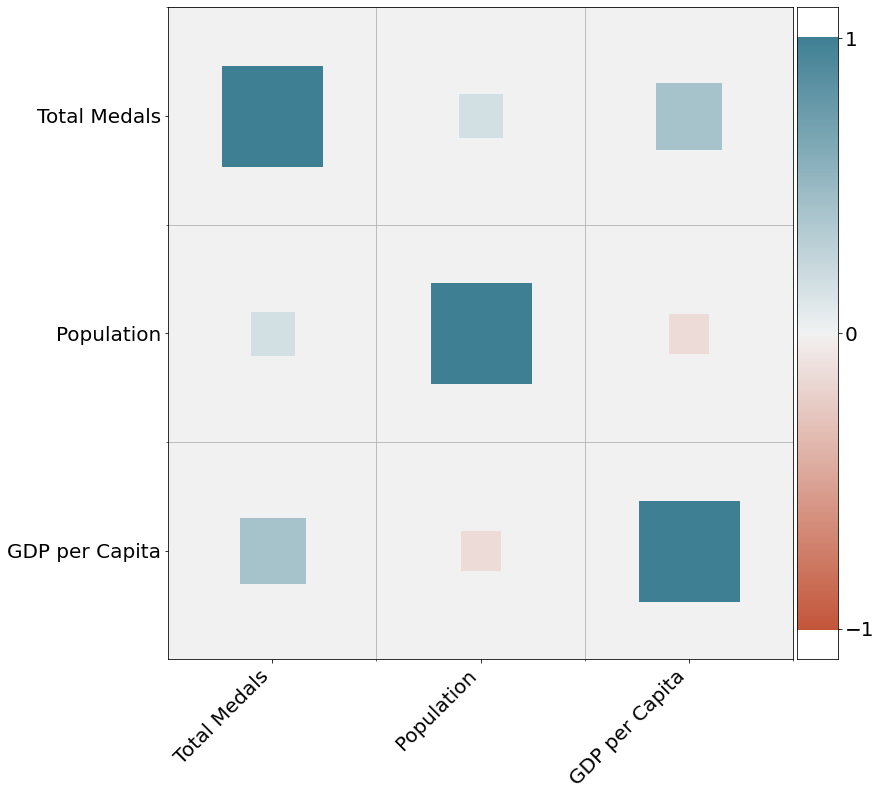

In [46]:
# From https://github.com/dylan-profiler/heatmaps/blob/master/heatmap/heatmap.py

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order', 'xlabel', 'ylabel'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    ax.set_xlabel(kwargs.get('xlabel', ''))
    ax.set_ylabel(kwargs.get('ylabel', ''))

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right

def corrplot(data, size_scale=10000, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index').replace(np.nan, 0)
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

fig, ax = plt.subplots(figsize=(12, 12))

# Set general font size
plt.rcParams['font.size'] = '20'

corrplot(unified.corr())
ax.set_facecolor("white") # set axis background color to white
fig.set_facecolor("white") # set figure background color to white
fig.savefig("winter_olympic_medal_corr.png", dpi=300, bbox_inches = 'tight')

Here are the top medal winning countries from 1998 to 2022:

In [47]:
top_medals = medal_count.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

top_medals

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Germany,32,40,32,36,21,36,35,232
United States,15,37,27,39,32,26,28,204
Norway,25,25,20,24,27,42,39,202
Canada,16,18,26,29,27,34,27,177
Russian Federation,22,15,25,19,33,18,38,170


In [48]:
dfi.export(top_medals.background_gradient(), 'top_medalists.png')

objc[3774]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x10a7e7f48). One of the two will be used. Which one is undefined.
[0501/041433.009637:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmpt060n8fp/temp.png.


The first metric of evaluating a country's ability to win medals in the Olympics is population. The higher the number of people, the greater the chances that talent can be identified.

The most populated nations that have won medals in the Olympics from 1998 to 2022 are as follows:

In [49]:
top_pop = population.sort_values(by = ['2022'], ascending = False).head(5).style.format('{:,.0f}')

top_pop

,1998,2002,2006,2010,2014,2018,2022
Country Name,,,,,,,
China,"1,241,935,000","1,280,400,000","1,311,020,000","1,337,705,000","1,371,860,000","1,402,760,000","1,419,098,724"
United States,"275,854,000","287,625,193","298,379,912","309,327,143","318,386,329","326,838,199","332,130,047"
Russian Federation,"147,670,784","145,306,497","143,049,637","142,849,468","143,819,667","144,477,859","143,730,301"
Japan,"126,400,000","127,445,000","127,854,000","128,070,000","127,276,000","126,529,100","125,142,942"
Germany,"82,047,195","82,488,495","82,376,451","81,776,930","80,982,500","82,905,782","83,575,268"


In [50]:
dfi.export(top_pop.background_gradient(), 'top_population.png')

objc[3788]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x1132d3f48). One of the two will be used. Which one is undefined.
[0501/041434.053598:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmp68z5tt2r/temp.png.


However, it is possibly that some countries have high potential although financially inhibited at the moment. Next, the correlation between affluence in terms of GDP per capita and medal count shall be evaluated.

The most affluent countries that have won medals in the Olympics from 1998 to 2022 are as follows:

In [51]:
top_inc = GDP_per_capita.sort_values(by = ['2022'], ascending = False).head(5).style.format('{:,.0f}')

top_inc

,1998,2002,2006,2010,2014,2018,2022
Country Name,,,,,,,
Switzerland,"42,740","42,579","59,301","77,117","89,685","86,388","87,786"
United States,"32,854","38,023","46,299","48,467","55,050","63,064","64,114"
Denmark,"33,368","33,229","52,027","58,041","62,549","61,592","60,542"
Norway,"34,788","43,084","74,148","87,694","97,019","82,268","52,762"
Netherlands,"27,886","29,204","44,863","50,950","52,830","53,019","51,790"


In [52]:
dfi.export(top_inc.background_gradient(), 'top_income.png')

objc[3798]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x10e763f48). One of the two will be used. Which one is undefined.
[0501/041435.132585:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmpmmwbnyd4/temp.png.


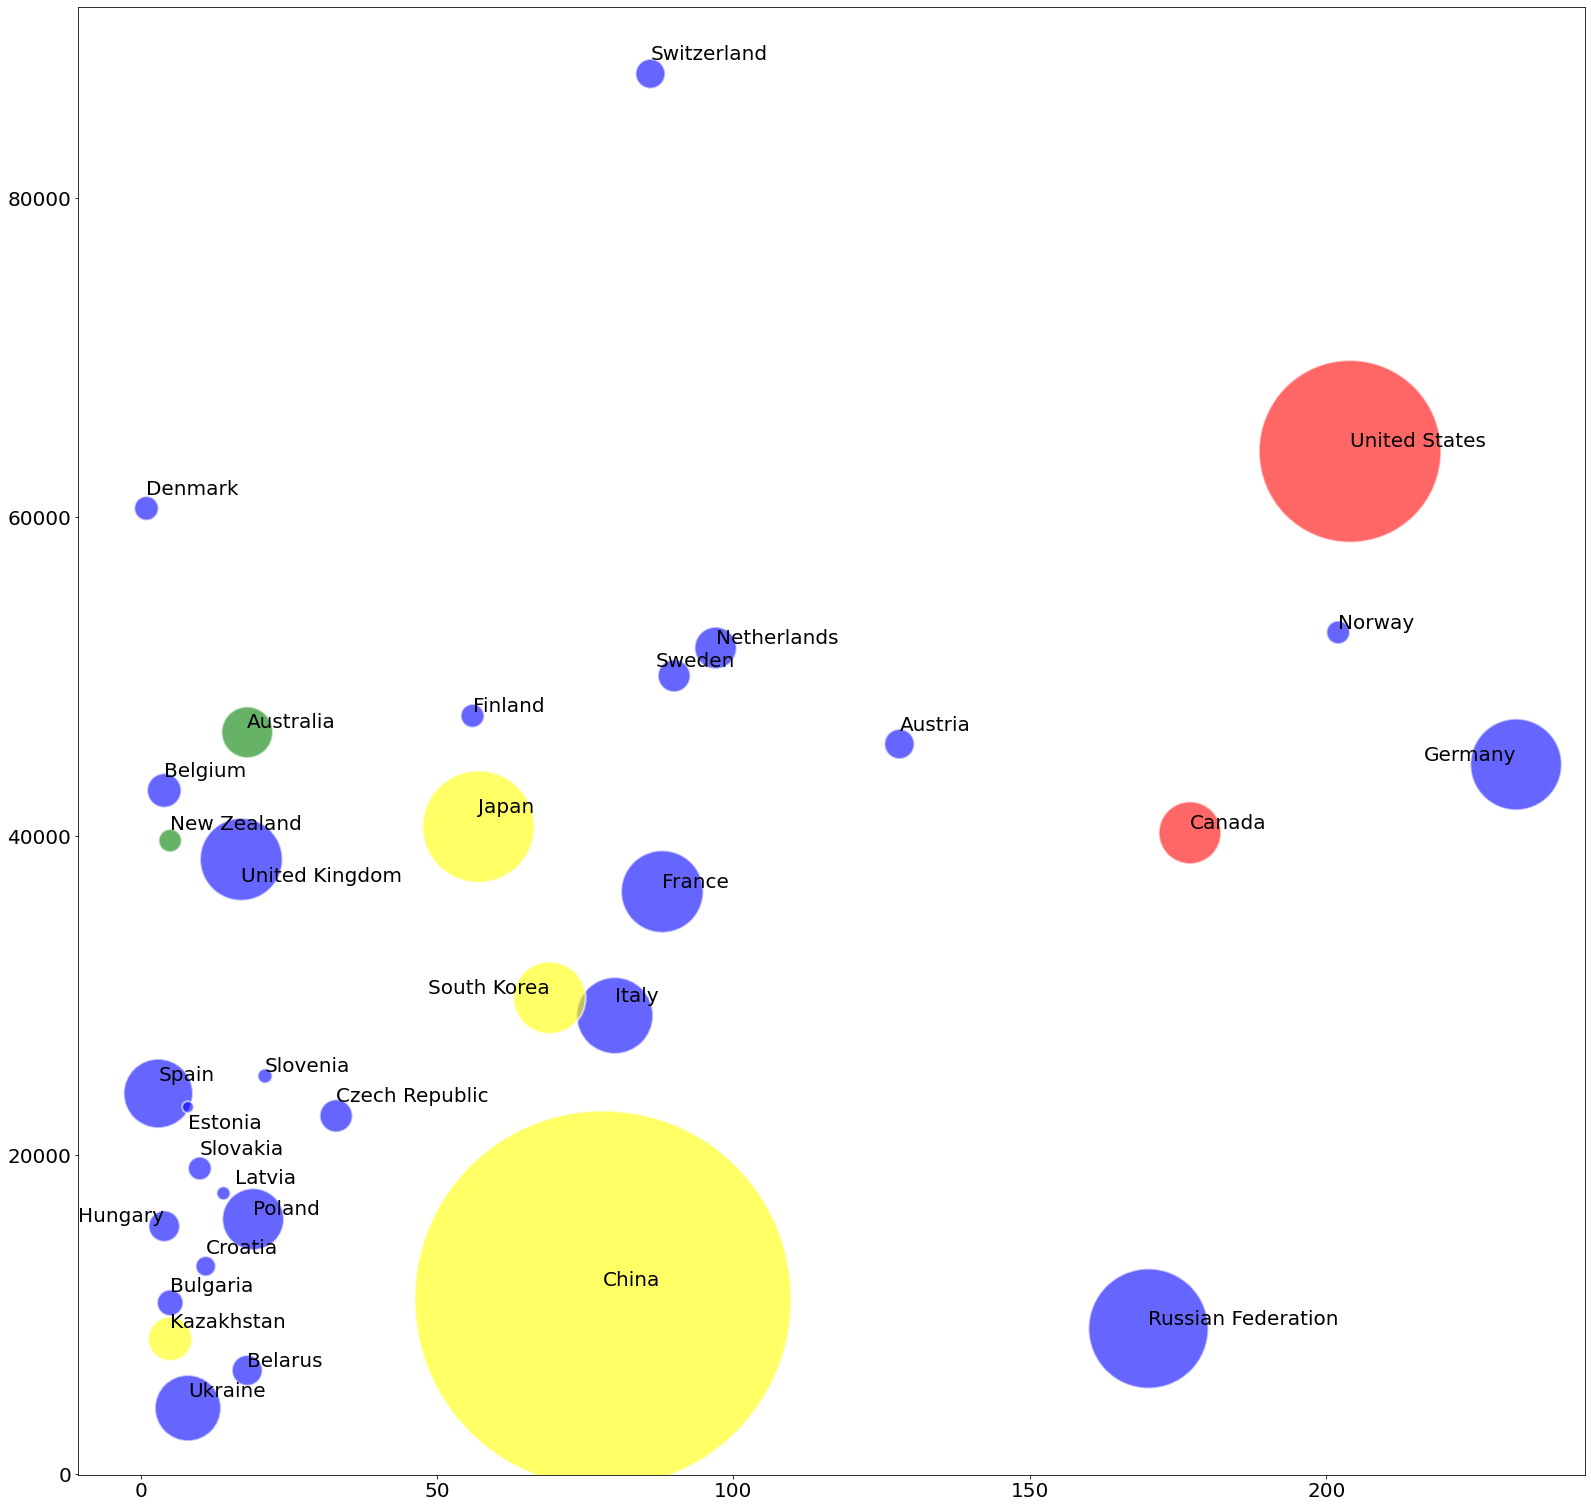

In [53]:
inc = unified['GDP per Capita']
med = unified['Total Medals']
reg = c2r['Region']
pop = population['2022']

fig, ax = plt.subplots(figsize=(27, 27))
colors = {'North America':'red', 'Europe':'blue', 'Asia': 'yellow', 'Oceania': 'green'}
ax.scatter(med, inc, c = reg.map(colors), s = pop/10000, cmap="Accent", alpha=0.6, 
    edgecolors="white", linewidth=2);

# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = unified.index.values


# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = [
    'Switzerland', 'United States', 'Denmark', 'Norway', 'Netherlands',
    'Ukraine', 'Belarus', 'Kazakhstan', 'Russian Federation', 'Bulgaria',
    'Germany', 'Canada', 'Austria', 'Sweden', 'France',
    'China', 'Italy', 'South Korea', 'Japan', 'Finland',
    'Australia', 'Czech Republic', 'Slovenia', 'Belgium', 'United Kingdom'
]

# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    # if country in COUNTRY_HIGHLIGHT:
        x, y = med[idx], inc[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=20));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(1, 2),
    arrowprops=dict(arrowstyle="-", lw=0),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
ax.set_facecolor("white") # set axis background color to white
fig.set_facecolor("white") # set figure background color to white
fig.savefig("medals_per_gdp_capita.png", dpi=300, bbox_inches = 'tight')

Since not all countries perform equally with respect to various events, it is important to identify the top performers in each category and examine critical trends

For sledding events (bobsleigh, luge, and skeleton) the top performers have been:

In [54]:
mc_sled = medal_count_sledding.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

mc_sled

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Germany,9,13,10,13,6,15,23,89
United States,4,11,2,3,10,3,4,37
Canada,2,0,5,6,2,6,2,23
Austria,1,2,2,3,2,4,4,18
Latvia,0,0,1,3,7,2,1,14


In [55]:
dfi.export(mc_sled.background_gradient(), 'top_sledding.png')

objc[3812]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x1163b4f48). One of the two will be used. Which one is undefined.
[0501/041443.499703:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmpg0e9j3zh/temp.png.


Clearly overwhelmingly dominated by Germany, which is already a perennial top performer in the Winter Olympics.

For skating events (both long track and short track) the top performers have been:

In [56]:
mc_skate = medal_count_skating.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

mc_skate

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Netherlands,11,8,9,7,24,20,16,95
South Korea,6,4,11,13,7,13,9,63
Canada,9,9,12,10,5,7,9,61
China,6,7,7,5,7,4,5,41
United States,2,11,10,10,1,2,3,39


In [57]:
dfi.export(mc_skate.background_gradient(), 'top_skating.png')

objc[3822]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x10b44ef48). One of the two will be used. Which one is undefined.
[0501/041444.481459:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmp4km2k3hc/temp.png.


While the Netherlands is cleaely dominating this sport, it is interesting to note that Asian countries such as South Korea and China are also strong performers. A closer examination between the long track and short track events should be taken to see where the chips fall.

In [58]:
# Copy a table that have country names
medal_count_long_track = population.copy()
medal_count_short_track = population.copy()

# Clean the table
for col in population.columns:
    medal_count_long_track[col].values[:] = 0
    medal_count_short_track[col].values[:] = 0

# Populate the table with the number of medals per country per olympiad
for index, year in enumerate(olympiads, 0):
    # Find medals in each year
    medals_long_track = winter_medal_table.loc[winter_medal_table['Sport'].isin(['Long Track Speed Skating'])
                      & winter_medal_table['Year'].isin([year])]
    medals_short_track = winter_medal_table.loc[winter_medal_table['Sport'].isin(['Short Track Speed Skating'])
                      & winter_medal_table['Year'].isin([year])]
    # Count values
    medals_long_track = medals_long_track['Country Name'].value_counts()
    medals_short_track = medals_short_track['Country Name'].value_counts()
    # Create dataframe
    medals_long_track = medals_long_track.to_frame()
    medals_short_track = medals_short_track.to_frame()
    # Extract values and index
    medals_values_long_track = medals_long_track['Country Name']
    medals_index_long_track = medals_long_track.index
    medals_values_short_track = medals_short_track['Country Name']
    medals_index_short_track = medals_short_track.index
    # Dump values into the table
    medal_count_long_track.loc[medals_index_long_track, year] = medals_values_long_track
    medal_count_short_track.loc[medals_index_short_track, year] = medals_values_short_track
    # Convert to int
    medal_count_long_track[year] = medal_count_long_track[year].astype('int')
    medal_count_short_track[year] = medal_count_short_track[year].astype('int')

# Sum all olympiads, since no progressive pattern can be identified
medal_count_long_track['Total'] = medal_count_long_track[olympiads].sum(axis = 1)
medal_count_short_track['Total'] = medal_count_short_track[olympiads].sum(axis = 1)

For long track speed skating the top performers have been:

In [59]:
mc_ltss = medal_count_long_track.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

mc_ltss

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Netherlands,11,8,9,7,23,16,12,86
Canada,5,3,8,5,2,2,5,30
United States,2,8,7,4,0,1,3,25
Germany,6,8,3,4,0,0,0,21
South Korea,0,0,1,5,2,7,4,19


In [60]:
dfi.export(mc_ltss.background_gradient(), 'top_long_track.png')

objc[3832]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x108a60f48). One of the two will be used. Which one is undefined.
[0501/041445.539670:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmppnxszg6m/temp.png.


For short track speed skating the top performers have been:

In [61]:
mc_stss = medal_count_short_track.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

mc_stss

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
South Korea,6,4,10,8,5,6,5,44
China,6,7,5,4,6,3,4,35
Canada,4,6,4,5,3,5,4,31
United States,0,3,3,6,1,1,0,14
Italy,0,1,1,1,3,3,4,13


In [62]:
dfi.export(mc_stss.background_gradient(), 'top_short_track.png')

objc[3842]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x110c2cf48). One of the two will be used. Which one is undefined.
[0501/041446.534896:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmplg39xu0p/temp.png.


While the Netherlands overwhelmingly dominated long track, South Korea fields the top short track skaters with China as a second. Both the United States and Canada have strong competitors in both categories, however.

For skiing events (all excluding freestyle) the top performers have been:

In [63]:
mc_ski = medal_count_skiing.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

mc_ski

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
Norway,20,21,18,20,26,35,32,172
Germany,12,19,18,17,11,16,11,104
Austria,15,15,21,11,14,11,11,98
Russian Federation,12,7,13,10,8,9,18,77
Sweden,2,5,13,11,13,13,10,67


In [64]:
dfi.export(mc_ski.background_gradient(), 'top_skiing.png')

objc[3852]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x107de0f48). One of the two will be used. Which one is undefined.
[0501/041447.532552:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmpw7h9h1c1/temp.png.


While skiing is normally dominated by Europeans, during the 2010 Winter Olympics, a friend of the author who happened to be a sports buff ventured, "When Americans suck at sports, they just invent their own". Since 1998 was the first year snowboarding was included, this is where the last piece of the puzzle shall be assembled.

In [65]:
mc_board = medal_count_snowboarding.sort_values(by = ['Total'], ascending = False).head(5).style.format('{:,.0f}')

mc_board

,1998,2002,2006,2010,2014,2018,2022,Total
Country Name,,,,,,,,
United States,2,5,7,5,5,7,5,36
Canada,1,0,1,3,2,4,7,18
Switzerland,2,2,4,1,3,1,1,14
France,1,3,1,3,2,2,1,13
Austria,1,0,1,2,2,1,4,11


In [66]:
dfi.export(mc_board.background_gradient(), 'top_snowboarding.png')

objc[3862]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4a49a318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.127/Libraries/libGLESv2.dylib (0x11cb58f48). One of the two will be used. Which one is undefined.
[0501/041448.622362:INFO:headless_shell.cc(659)] Written to file /var/folders/kg/5clnm8vj1jz2tlvmfxjvq3_00000gn/T/tmp2l0rqxs2/temp.png.


As clearly shown, snowboarding is dominated by the United States with its northern neighbor Canada as a runner-up. However, this activity that is North American by origin has become popular among Alpine countries.